In [33]:

import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import re
%matplotlib inline

In [34]:
df_job_skills = pd.read_csv('job_skills.csv')

In [35]:
df_job_skills.shape

(1250, 7)

In [36]:

df_job_skills.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [37]:
df_job_skills.tail()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
1245,Google,Global Investigator,Real Estate & Workplace Services,"Boulder, CO, United States",Develop protocols and practices to assess and ...,BA/BS degree or equivalent practical experienc...,Investigative or Interview certification throu...
1246,Google,Campus Security Manager,Real Estate & Workplace Services,"Boulder, CO, United States",Manage the daily operations of the security ve...,BA/BS degree or equivalent practical experienc...,Master’s degree.\nProficient in the use of com...
1247,Google,Facilities Manager,Real Estate & Workplace Services,"Xinyi District, Taiwan",Collaborate with functional teams; plan and ma...,BA/BS degree or equivalent practical experienc...,Experience managing outsourced facilities serv...
1248,Google,Physical Security Manager,Real Estate & Workplace Services,"Tel Aviv-Yafo, Israel",Partner closely with and offer guidance and co...,BA/BS degree or equivalent practical experienc...,Experience working on international programs.\...
1249,Google,Physical Security Manager,Real Estate & Workplace Services,"Wrocław, Poland",Partner closely with and offer guidance and co...,BA/BS degree or equivalent practical experienc...,Experience working on international programs.\...


{'python': 97, 'java': 76, 'c++': 54, 'php': 7, 'javascript': 77, 'objective-c': 3, 'ruby': 14, 'perl': 6, 'c': 18, 'c#': 15, 'sql': 73, 'kotlin': 3}


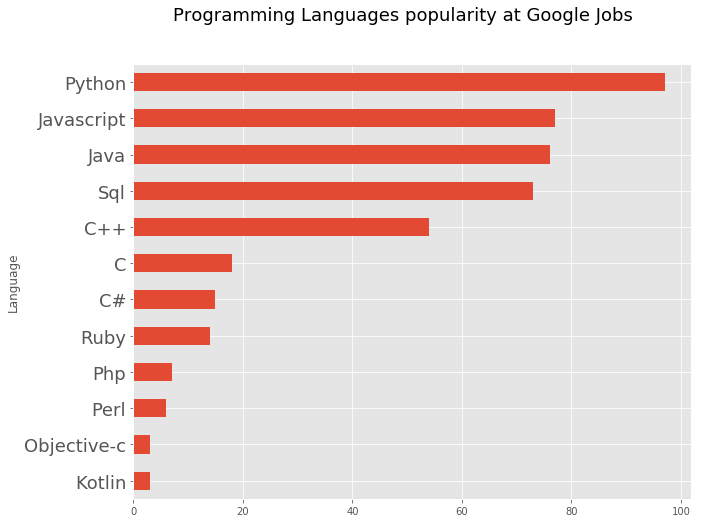

In [38]:
programing_language_list = ['python', 'java', 'c++', 'php', 'javascript', 'objective-c', 'ruby', 'perl','c','c#', 'sql','kotlin']
minimum_qualifications = df_job_skills['Minimum Qualifications'].tolist()
miniumum_qualifications_string = "".join(str(v) for v in minimum_qualifications).lower()
wordcount = dict((x,0) for x in programing_language_list)
for w in re.findall(r"[\w'+#-]+|[.!?;’]", miniumum_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
print(wordcount)
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
# Capitalize each programming language first letter
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
df_popular_programming_lang = df_popular_programming_lang[::-1]
df_popular_programming_lang.plot.barh(x='Language',y='Popularity',figsize=(10,8), legend=False)

plt.suptitle("Programming Languages popularity at Google Jobs", fontsize=18)
plt.xlabel("")

plt.yticks(fontsize=18)
plt.show()

{'BA': 838, 'BS': 879, "Bachelor's": 149, 'PhD': 8}


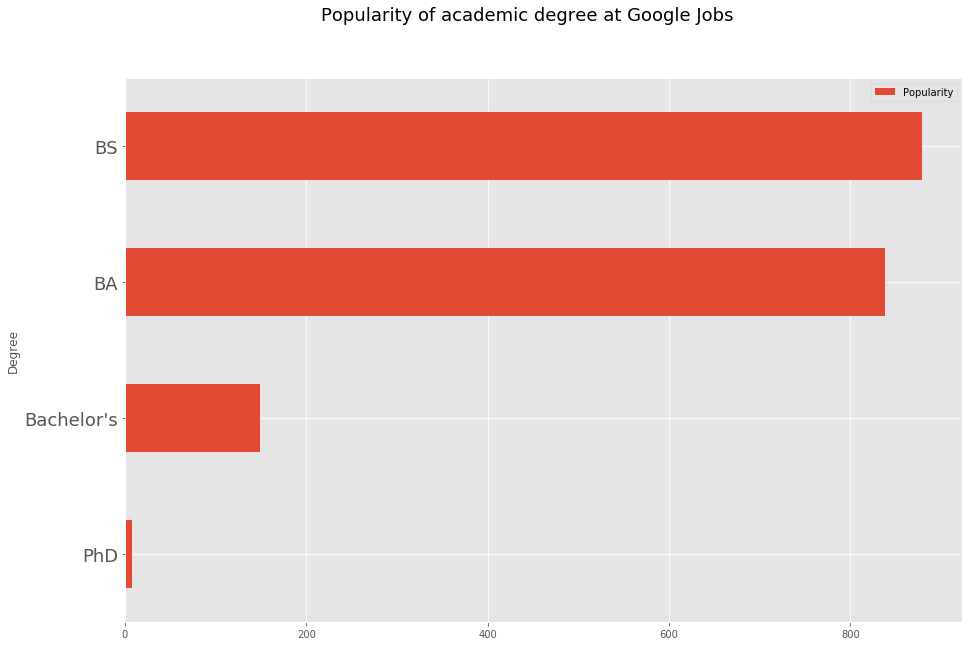

In [39]:
miniumum_qualifications_string = " ".join(str(v) for v in minimum_qualifications)
degree_list = ["BA", "BS", "Bachelor's", "PhD"]
wordcount = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w']+|[.,!?;’]", miniumum_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
print(wordcount)
degree_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

df_degree_popular = pd.DataFrame(degree_popularity,columns=['Degree','Popularity'])

df_degree_popular = df_degree_popular[::-1] 
df_degree_popular.plot.barh(x='Degree',y='Popularity',figsize=(15,10), stacked=True)
plt.suptitle("Popularity of academic degree at Google Jobs ", fontsize=18)
plt.xlabel("")
plt.yticks(fontsize=18)
plt.show()

C:\Users\Arpit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


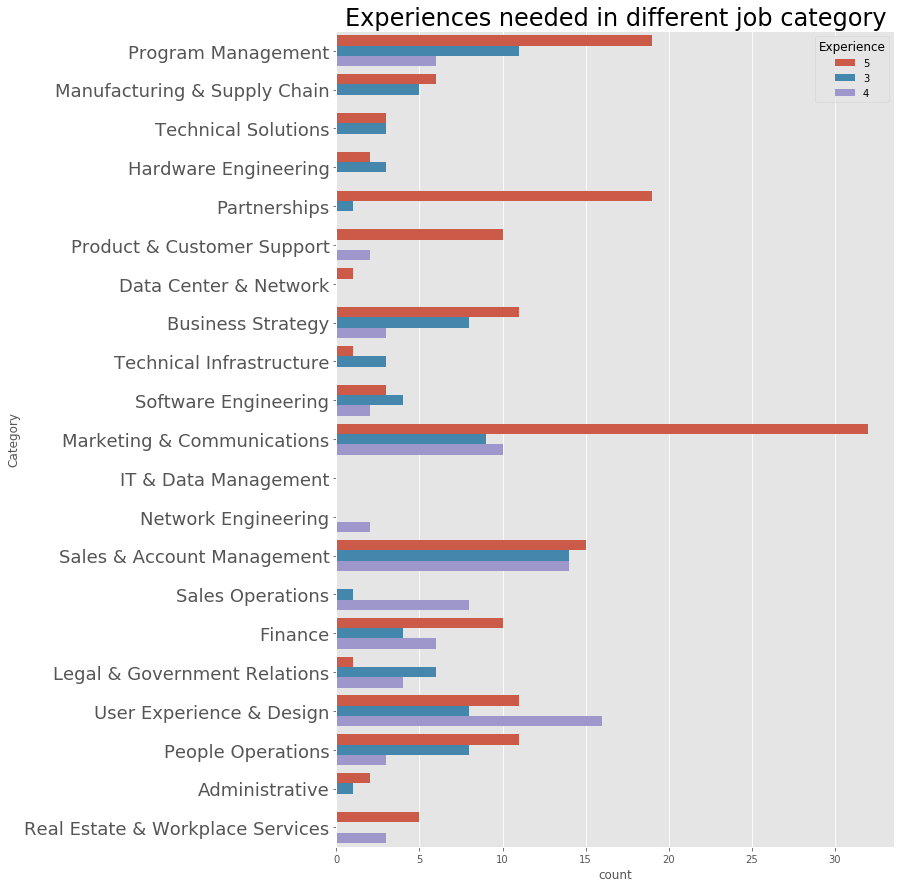

In [11]:
df_job_skills['Experience'] = df_job_skills['Minimum Qualifications'].str.extract(r'([0-9]+) year')

dff = df_job_skills[['Experience','Category']]
dff = dff.dropna()

plt.figure(figsize=(10,15))
plt.title('Experiences needed in different job category', fontsize=24)
sns.countplot(y='Category', hue='Experience', data=dff, hue_order=dff.Experience.value_counts().iloc[:3].index)
plt.yticks(fontsize=18)
plt.show()


In [16]:
def plotting(df):
    df.plot.barh(x=df.columns[0],y=df.columns[1],figsize=(25,20), legend=True,stacked=True )
    # add a suptitle
    plt.suptitle( df.columns[0] +" "+ df.columns[1]+" "+ "at Google Jobs", fontsize=25)
    
    plt.xlabel(df.columns[1], fontsize=25)
    plt.ylabel(df.columns[0],fontsize=25)
    # change xticks fontsize to 14
    plt.yticks(fontsize=20)
    plt.gca().invert_yaxis()
    # finally show the plot
    plt.show()

In [19]:
job_skills = pd.read_csv('job_skills.csv')
print(job_skills.shape)
job_skills['Country_Location']=job_skills['Location'].str.split(',').str[-1]
country_value_counts = job_skills.Country_Location.value_counts()
country_value_counts=country_value_counts[country_value_counts.values>=10] #Values less than 10 are ignored for better visualisation
#location_value_counts = location_value_counts[::-1]
df_popular_country=pd.Series.to_frame(country_value_counts).reset_index()
df_popular_country.columns=['Country_Location', 'Preference']
df_popular_country.head(8)

(1250, 7)


,Country_Location,Preference
0,United States,638
1,Ireland,87
2,United Kingdom,62
3,Germany,54
4,Singapore,41
5,China,38
6,Australia,35
7,Japan,31


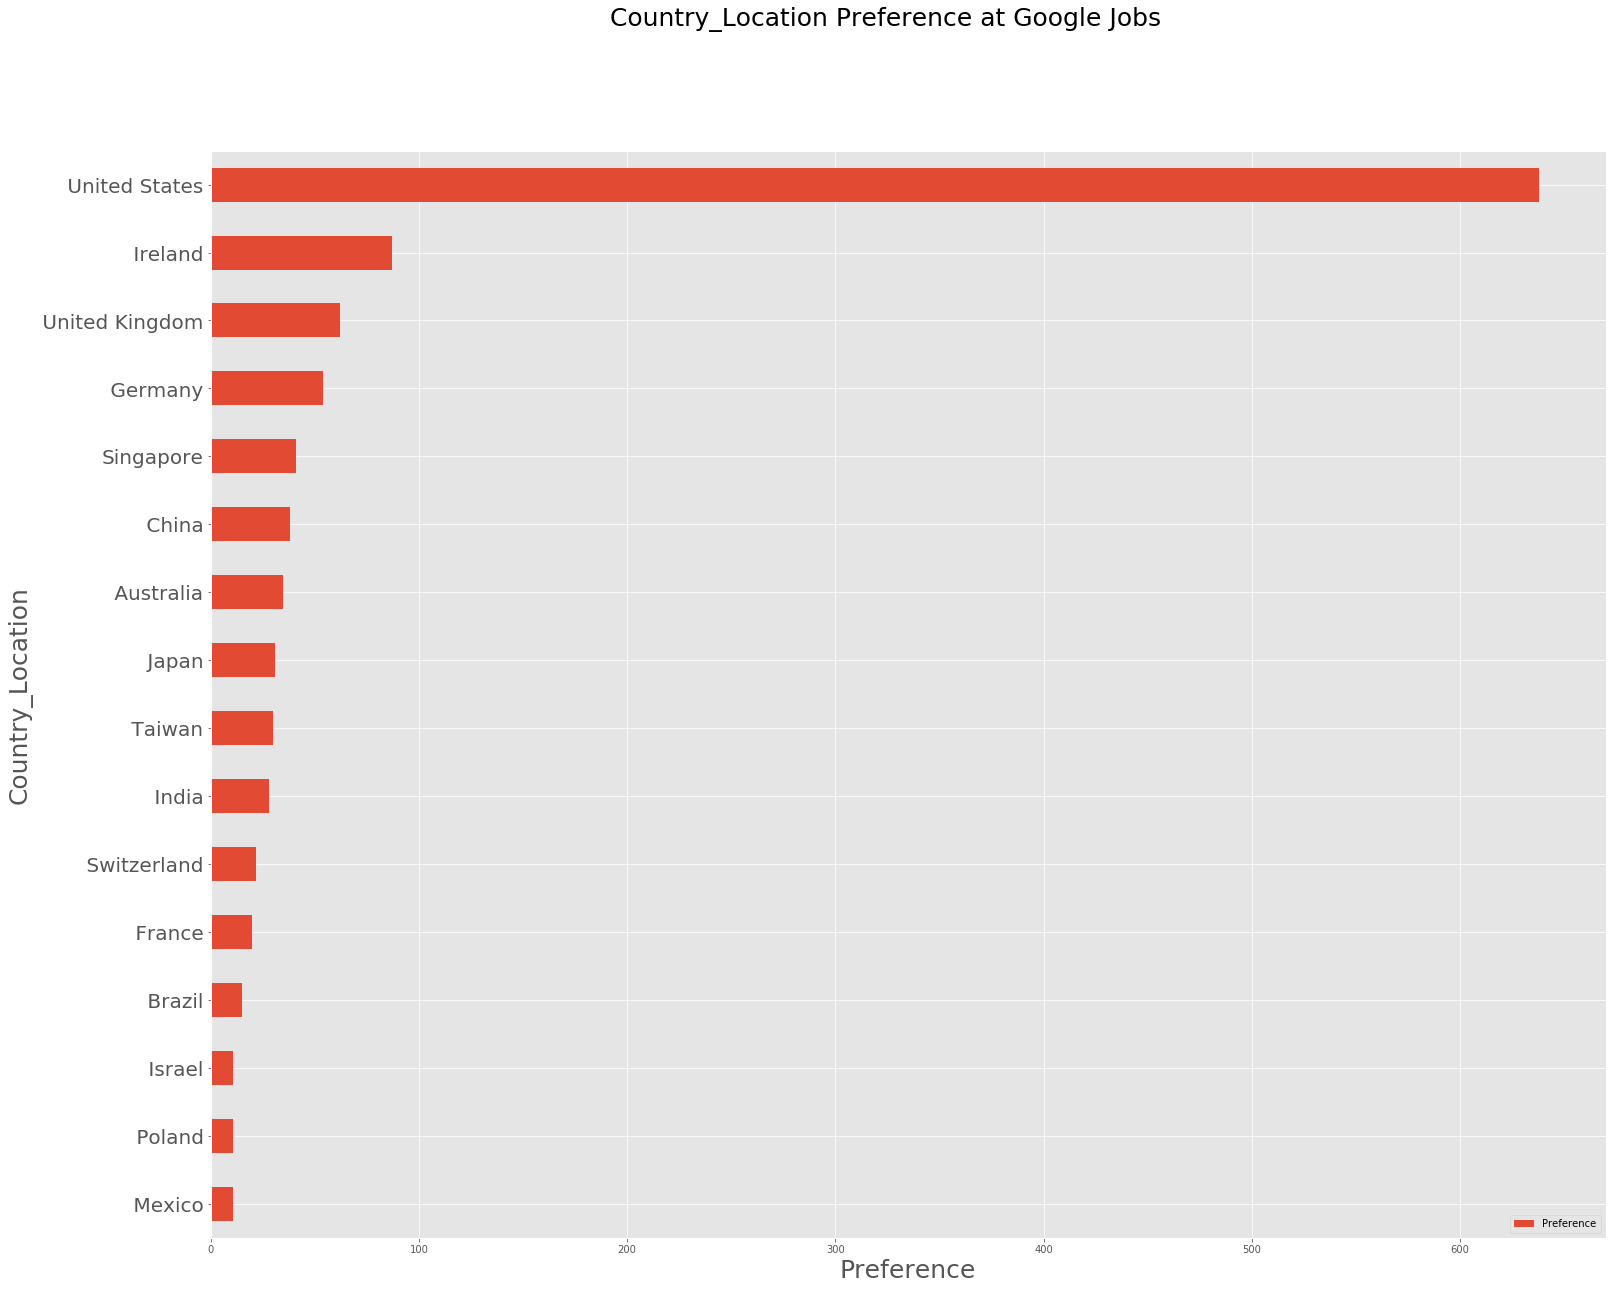

In [20]:
plotting(df_popular_country)

In [23]:
job_skills['City_Location']=job_skills['Location'].str.split(',').str[0]
city_value_counts = job_skills.City_Location.value_counts()
city_value_counts=city_value_counts[city_value_counts.values>=10] #Values less than 10 are ignored for better visualisation
df_popular_city=pd.Series.to_frame(city_value_counts).reset_index()
df_popular_city.columns=['City', 'Preference']
df_popular_city.head(8)


,City,Preference
0,Mountain View,190
1,Sunnyvale,155
2,Dublin,87
3,New York,70
4,London,62
5,San Francisco,49
6,Singapore,41
7,Tokyo,31


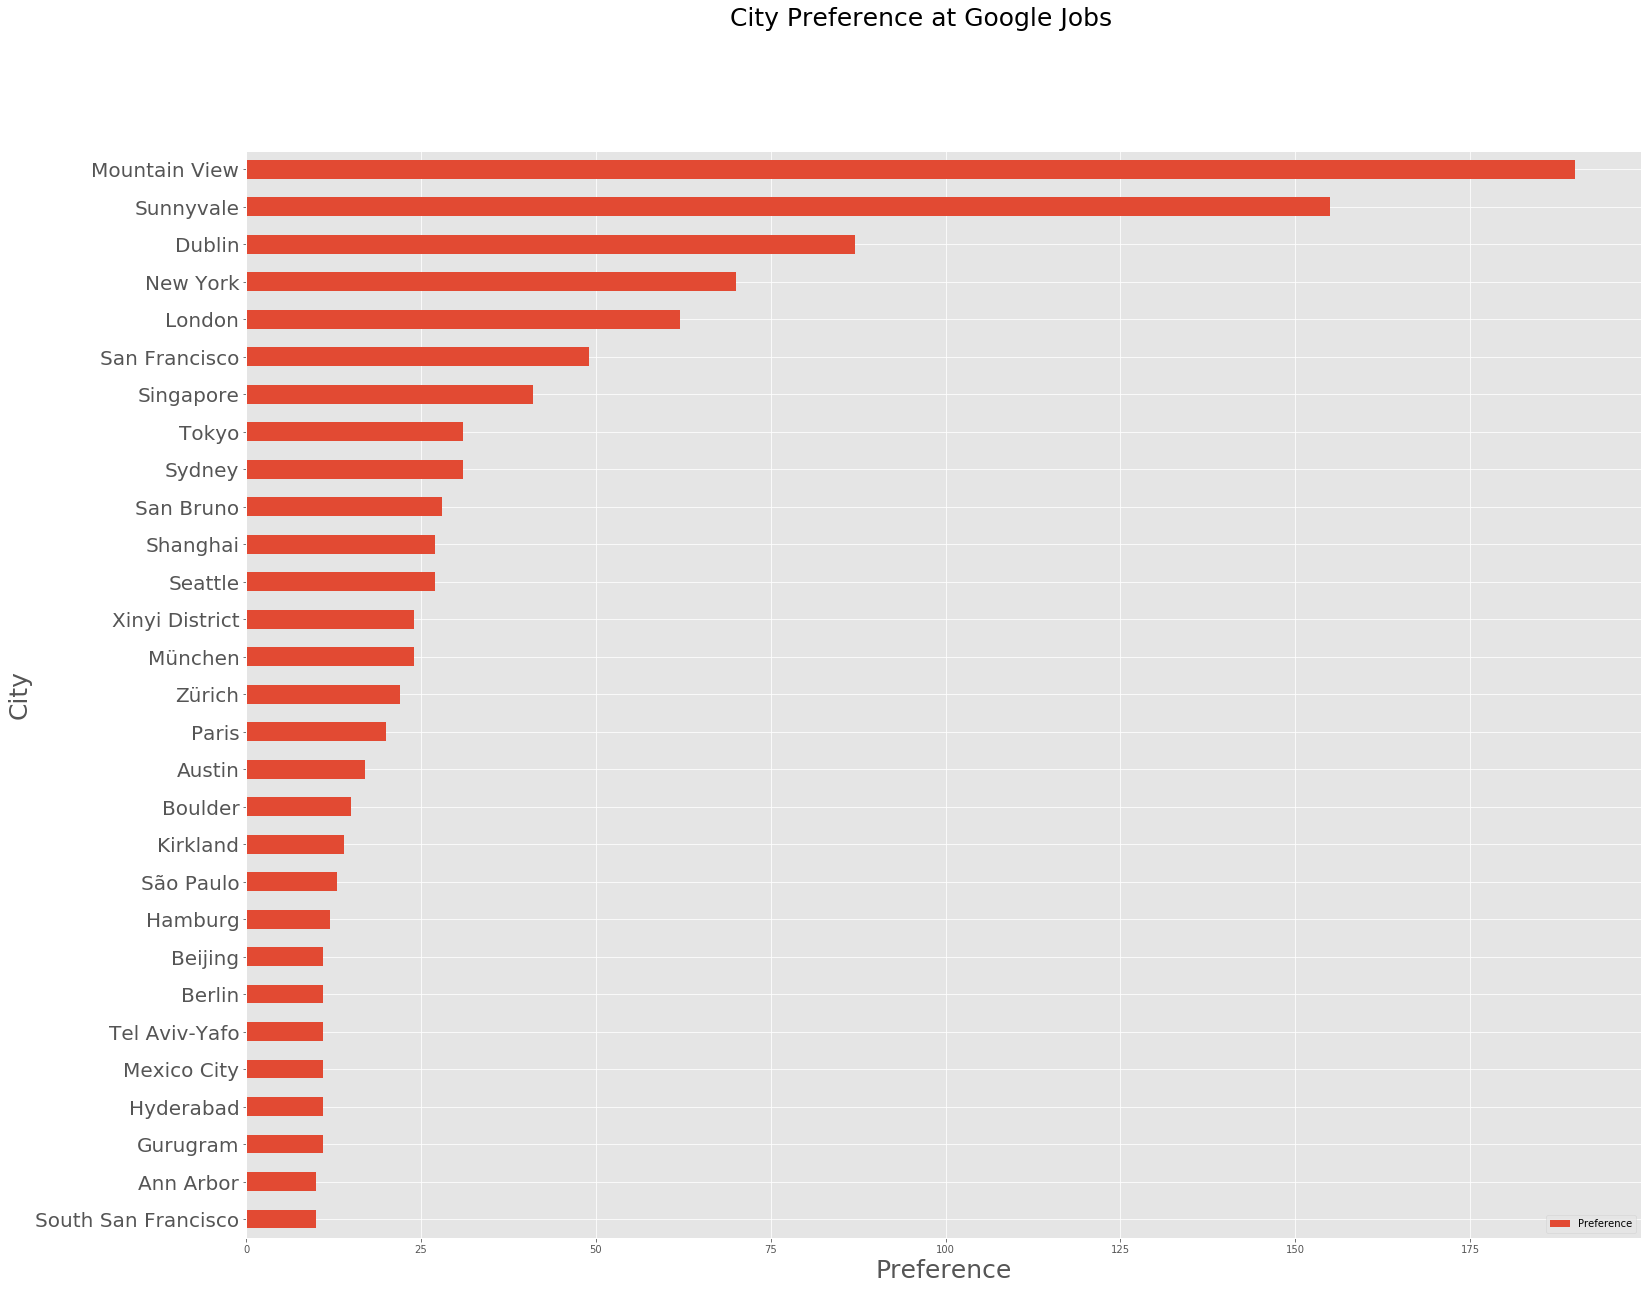

In [24]:
plotting(df_popular_city)

defaultdict(<function <lambda> at 0x0000013201A79F28>, {'3': 114, '7': 41, '2': 60, '1': 16, '4': 92, '10': 76, '5': 181, '12': 18, '8': 65, '6': 60, '9': 8, '15': 4, '13': 1, '11': 1, '14': 1})


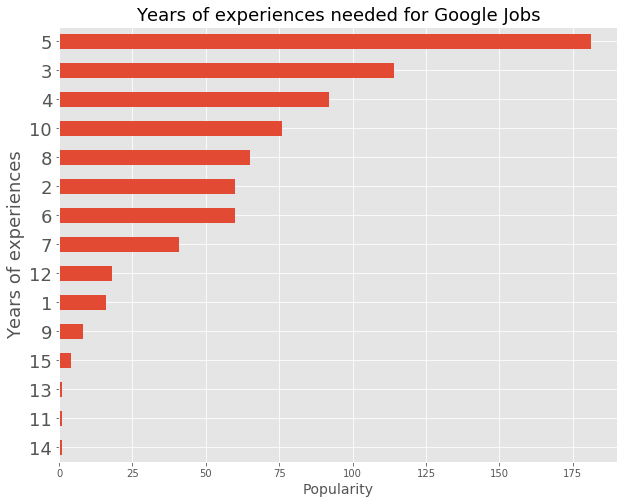

In [30]:
years_exp = defaultdict(lambda: 0)

for w in re.findall(r'([0-9]+) year', miniumum_qualifications_string):
     years_exp[w] += 1
        
print(years_exp)

years_exp = sorted(years_exp.items(), key=lambda kv: kv[1], reverse=True)

df_years_exp = pd.DataFrame(years_exp,columns=['Years of experience','Popularity'])
df_years_exp = df_years_exp[::-1] 

# plot
df_years_exp.plot.barh(x='Years of experience',y='Popularity',figsize=(10, 8), legend=False,stacked=True)
# add a suptitle
plt.title("Years of experiences needed for Google Jobs", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Years of experiences",fontsize=18)
# change xticks fontsize to 14
plt.yticks(fontsize=18)
# finally show the plot
plt.show()



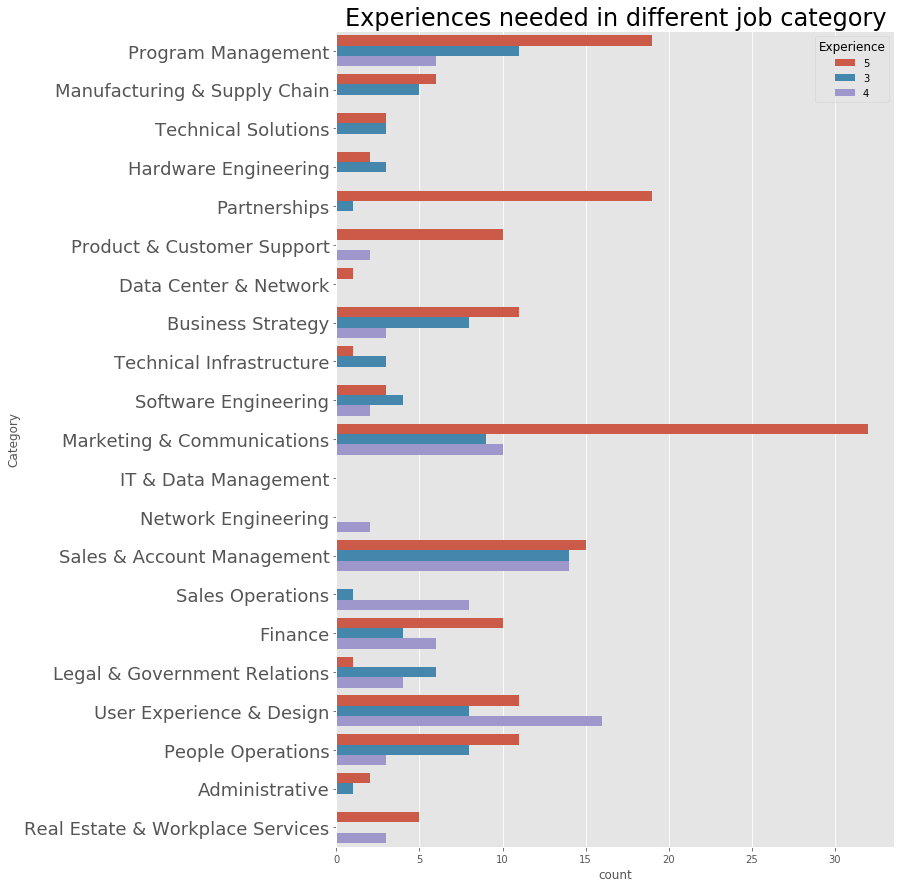

In [40]:
df_job_skills['Experience'] = df_job_skills['Minimum Qualifications'].str.extract(r'([0-9]+) year')

dff = df_job_skills[['Experience','Category']]
dff = dff.dropna()

plt.figure(figsize=(10,15))
plt.title('Experiences needed in different job category', fontsize=24)
sns.countplot(y='Category', hue='Experience', data=dff, hue_order=dff.Experience.value_counts().iloc[:3].index)
plt.yticks(fontsize=18)
plt.show()

